# Advanced Transformations Core

Kris Barbier

- Tasks to complete:
    - Split Hero|Publisher column into Hero and Publisher
    - Split Measurements column into Height and Weight
    - One-Hot encode all powers from the Powers column

In [28]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
#Load in superhero_info data
df_heroes = pd.read_csv('Data/superhero_info - superhero_info.csv')

#Preview data
df_heroes.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
#Preview info
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [4]:
#Load in superhero_powers data
df_powers = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

#Preview data
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
#Preview info
df_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [6]:
#Split hero/publisher
df_heroes[['Hero', 'Publisher']] = df_heroes['Hero|Publisher'].str.split('|', expand = True)
#Verify the split
df_heroes.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [7]:
#Drop Hero|Publisher
df_heroes = df_heroes.drop(columns = 'Hero|Publisher')
#Verify the drop
df_heroes.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
##Split measurements into height and weight
#Use str.replace to replace single quotes
df_heroes['Measurements'] = df_heroes['Measurements'].str.replace("'",'"')
#Apply json.loads to whole column
df_heroes['Measurements'] = df_heroes['Measurements'].apply(json.loads)
#Verify changes
df_heroes['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [9]:
#Check a single value after transformation
test_measurement = df_heroes.loc[0, 'Measurements']
print(type(test_measurement))
test_measurement

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [10]:
#Create series of height and weight values
height_weight = df_heroes['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [11]:
#Split columns to obtain only numeric values
height_weight[['Height (cm)', 'cm']] = height_weight['Height'].str.split(' ', expand = True)
height_weight[['Weight (kg)', 'kg']] = height_weight['Weight'].str.split(' ', expand = True)

#Verify changes
height_weight

,Height,Weight,Height (cm),cm,Weight (kg),kg
0,203.0 cm,441.0 kg,203.0,cm,441.0,kg
1,191.0 cm,65.0 kg,191.0,cm,65.0,kg
2,185.0 cm,90.0 kg,185.0,cm,90.0,kg
3,203.0 cm,441.0 kg,203.0,cm,441.0,kg
4,193.0 cm,122.0 kg,193.0,cm,122.0,kg
...,...,...,...,...,...,...
458,183.0 cm,83.0 kg,183.0,cm,83.0,kg
459,165.0 cm,52.0 kg,165.0,cm,52.0,kg
460,66.0 cm,17.0 kg,66.0,cm,17.0,kg
461,170.0 cm,57.0 kg,170.0,cm,57.0,kg


In [12]:
#Drop height, weight, cm, and kg columns
height_weight = height_weight.drop(columns = ['Height', 'Weight', 'cm', 'kg'])

#Verify the changes
height_weight.head()

,Height (cm),Weight (kg)
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0


In [13]:
#Concatenate frames
df_heroes = pd.concat((df_heroes, height_weight), axis = 1)
df_heroes.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0


In [14]:
#Drop measurements column
df_heroes = df_heroes.drop(columns = 'Measurements')
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       463 non-null    object
 1   Race         463 non-null    object
 2   Alignment    463 non-null    object
 3   Hair color   463 non-null    object
 4   Eye color    463 non-null    object
 5   Skin color   463 non-null    object
 6   Hero         463 non-null    object
 7   Publisher    463 non-null    object
 8   Height (cm)  463 non-null    object
 9   Weight (kg)  463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


In [15]:
#Change height and weight columns to numeric types
df_heroes[['Height (cm)', 'Weight (kg)']] = df_heroes[['Height (cm)', 'Weight (kg)']].astype('float')
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       463 non-null    object 
 1   Race         463 non-null    object 
 2   Alignment    463 non-null    object 
 3   Hair color   463 non-null    object 
 4   Eye color    463 non-null    object 
 5   Skin color   463 non-null    object 
 6   Hero         463 non-null    object 
 7   Publisher    463 non-null    object 
 8   Height (cm)  463 non-null    float64
 9   Weight (kg)  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


In [16]:
#Check values of Powers column
test_power = df_powers.loc[0, 'Powers']
test_power

'Agility,Super Strength,Stamina,Super Speed'

In [18]:
#Create new column where powers are split on the comma
df_powers['Powers_Split'] = df_powers['Powers'].str.split(',')
df_powers['Powers_Split'].head(2)

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
Name: Powers_Split, dtype: object

In [19]:
#Explode columns
exploded = df_powers.explode('Powers_Split')
exploded.head()

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [20]:
#Saving the unique values from the exploded column
cols_to_make = exploded['Powers_Split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [22]:
#Loop through columns to add True/False labels
for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)
df_powers.head()

,hero_names,Powers,Powers_Split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#Drop powers and powers_split columns
df_powers = df_powers.drop(columns = ['Powers', 'Powers_Split'])
#Verify the change
df_powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#Merge dataframes into 1
merged = pd.merge(df_heroes, df_powers, left_on = 'Hero', 
                  right_on = 'hero_names', how = 'inner')

merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


## Questions

### Question 1:

- Compare the average weight of super heroes who have Super Speed to those who do not.

    - Answer: Super heroes who have super speed tend to have a higher average weight than those that do not (which is surprising).

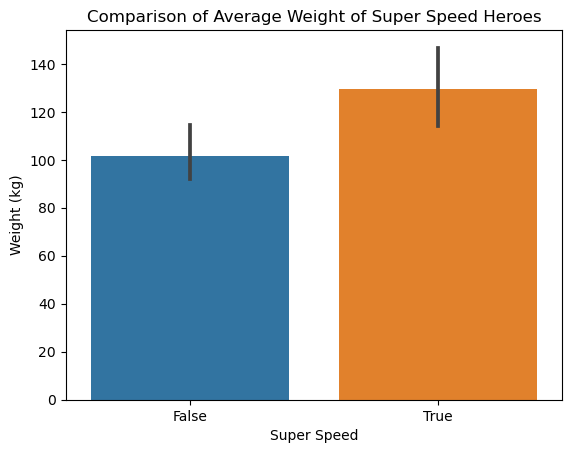

In [34]:
#Create visualization of super hero weights with super speed power
ax = sns.barplot(data = merged, x = 'Super Speed', y = 'Weight (kg)')
ax.set_title('Comparison of Average Weight of Super Speed Heroes');

### Question 2:

- What is the average height of heroes for each publisher?

    - Answer: Image Comics has the largest average height for super heroes, while George Lucas has the lowest average height for super heroes.

In [32]:
#Compare heights of heroes for each publisher
avg_height = merged.groupby('Publisher')['Height (cm)'].mean()
avg_height

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height (cm), dtype: float64

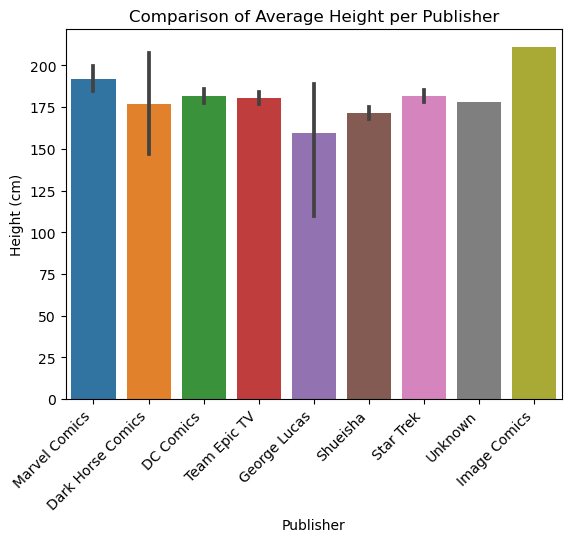

In [31]:
#Create visualization of heights for each publisher
ax = sns.barplot(data = merged, x = 'Publisher', y = 'Height (cm)')
ax.set_title('Comparison of Average Height per Publisher')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');